## 1. Downloading necessary libraries.

In [3]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from keys import API_KEY

if you do not see any output from the cells please generate an api key and plug it into the initial part of the code and run all the cells. it should work fine. Here is the link for getting the api key for eia data: https://www.eia.gov/opendata/

## 2. Getting the data through API and trying to extract some data.

In [4]:
def get_energy_data_batches(target_records=5000):
    url = "https://api.eia.gov/v2/electricity/rto/fuel-type-data/data/"

    time_periods = [
        # ("2019-01-01T00", "2019-03-31T23"),
        # ("2019-04-01T00", "2019-06-30T23"),
        # ("2019-07-01T00", "2019-09-30T23"),
        # ("2019-10-01T00", "2019-12-31T23"),
        # ("2020-01-01T00", "2020-03-31T23"),
        # ("2020-04-01T00", "2020-06-30T23"),
        # ("2020-07-01T00", "2020-09-30T23"),
        # ("2020-10-01T00", "2020-12-31T23"),
        # ("2021-01-01T00", "2021-03-31T23"),
        # ("2021-04-01T00", "2021-06-30T23"),
        # ("2021-07-01T00", "2021-09-30T23"),
        # ("2021-10-01T00", "2021-12-31T23"),
        # ("2022-01-01T00", "2022-03-31T23"),
        ("2025-05-30T17", "2025-05-31T03")
    ]
    
    all_data = []
    total_records = 0
    
    print("Starting data collection process...")
    
    for start_date, end_date in time_periods:
        if total_records >= target_records:
            print(f"Target of {target_records} records reached. Stopping data collection.")
            break
            
        params = {
            "api_key": API_KEY,
            "frequency": "hourly",
            "data[0]": "value",
            "start": start_date,
            "end": end_date,
            "sort[0][column]": "period",
            "sort[0][direction]": "asc",
            "length": 5000
        }
        
        print(f"Requesting data from {start_date} to {end_date}...")
        response = requests.get(url, params=params)
        
        if response.status_code == 200:
            data = response.json()
            if 'response' in data and 'data' in data['response']:
                batch = pd.DataFrame(data['response']['data'])
                batch_size = len(batch)
                
                if batch_size > 0:
                    all_data.append(batch)
                    total_records += batch_size
                    print(f"Retrieved {batch_size} records. Total collected: {total_records}")
                else:
                    print(f"No data returned for period {start_date} to {end_date}")
        else:
            print(f"API request failed with status code {response.status_code}")
    
    if not all_data:
        print("No data was collected.")
        return None
        
    energy_df = pd.concat(all_data, ignore_index=True)
    print(f"Successfully collected a total of {len(energy_df)} records")

    energy_df['period'] = pd.to_datetime(energy_df['period'])
    energy_df['value'] = pd.to_numeric(energy_df['value'], errors='coerce')
    
    return energy_df

energy_df = get_energy_data_batches(target_records=5000)

if energy_df is not None and not energy_df.empty:
    print("\nData collection successful!")
    print(f"Dataset shape: {energy_df.shape}")

else:
    print("Data collection failed.")

Starting data collection process...
Requesting data from 2025-05-30T17 to 2025-05-31T03...
Retrieved 5000 records. Total collected: 5000
Successfully collected a total of 5000 records

Data collection successful!
Dataset shape: (5000, 7)


In [5]:
energy_df.columns

Index(['period', 'respondent', 'respondent-name', 'fueltype', 'type-name',
       'value', 'value-units'],
      dtype='object')

In [6]:
energy_df.isna().sum()

period             0
respondent         0
respondent-name    0
fueltype           0
type-name          0
value              0
value-units        0
dtype: int64

In [ ]:
if energy_df is not None and not energy_df.empty:
    print("\n## Detailed Data Statistics")

    print("\nImportant Features:")
    print("1. period: Timestamp of energy generation")
    print("2. energy_source: Type of energy generation")
    print("3. value: Amount of energy generated (MWh)")
    print("4. respondent: Reporting entity")

    print("\nStatistics by Energy Source:")
    for source in combined_df['energy_source'].unique():
        source_data = combined_df[combined_df['energy_source'] == source]['value']
        print(f"\n{source}:")
        print(source_data.describe().round(2))

    print("\nObservation Distribution by Energy Source:")
    source_counts = combined_df['energy_source'].value_counts()
    print(source_counts)
    source_percent = combined_df['energy_source'].value_counts(normalize=True) * 100
    print("\nPercentage Distribution:")
    print(source_percent.round(2))
    
    plt.figure(figsize=(12, 6))
    source_counts.plot(kind='bar')
    plt.title('Number of Observations by Energy Source')
    plt.xlabel('Energy Source')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='energy_source', y='value', data=combined_df)
    plt.title('Distribution of Generation Values by Energy Source')
    plt.ylabel('Generation Value (MWh)')
    plt.xlabel('Energy Source')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 8))
    sns.violinplot(x='energy_source', y='value', data=combined_df)
    plt.title('Detailed Distribution of Generation Values by Energy Source')
    plt.ylabel('Generation Value (MWh)')
    plt.xlabel('Energy Source')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(16, 10))
    for column in energy_matrix.columns:
        plt.plot(energy_matrix.index, energy_matrix[column], label=column, alpha=0.7)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Energy Generation by Source Over Time')
    plt.xlabel('Date')
    plt.ylabel('Generation (MWh)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 10))
    corr_matrix = energy_matrix.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', 
                fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
    plt.title('Correlation Between Energy Sources')
    plt.tight_layout()
    plt.show()

    combined_df = energy_df.copy()
    combined_df.rename(columns={'fueltype': 'energy_source'}, inplace=True)

    combined_df['period'] = pd.to_datetime(combined_df['period'])
    combined_df['value'] = pd.to_numeric(combined_df['value'], errors='coerce')

    print("Creating wide-format dataframe using groupby/unstack...")
    energy_grouped = combined_df.groupby(['period', 'energy_source'])['value'].mean()
    energy_matrix = energy_grouped.unstack(level='energy_source')

    print("\n## Missing Value Analysis")
    missing_count = energy_matrix.isnull().sum()
    missing_percent = (energy_matrix.isnull().sum() / len(energy_matrix)) * 100
    
    missing_data = pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage': missing_percent.round(2)
    }).sort_values('Missing Values', ascending=False)
    
    print(missing_data)

    plt.figure(figsize=(14, 8))
    plt.title('Missing Values Heatmap (White = Missing)')

    missing_mask = energy_matrix.isnull()

    if len(energy_matrix) > 500:
        sample_size = min(500, len(energy_matrix))
        sampled_mask = missing_mask.sample(sample_size)
        sns.heatmap(sampled_mask, cbar=False, yticklabels=False, cmap='viridis_r')
        plt.xlabel('Energy Source')
        plt.ylabel(f'Time Periods (Sample of {sample_size} from {len(energy_matrix)})')
    else:
        sns.heatmap(missing_mask, cbar=False, yticklabels=False, cmap='viridis_r')
        plt.xlabel('Energy Source')
        plt.ylabel('Time Periods')
    
    plt.tight_layout()
    plt.show()

    if len(energy_matrix) > 0:
        missing_by_date = missing_mask.resample('D').sum()
        missing_by_date['month'] = missing_by_date.index.month
        missing_by_date['year'] = missing_by_date.index.year

        monthly_missing = missing_by_date.groupby(['year', 'month']).sum().sum(axis=1).unstack()

        plt.figure(figsize=(12, 6))
        sns.heatmap(monthly_missing, annot=True, fmt='.0f', cmap='YlOrRd')
        plt.title('Total Missing Values by Month')
        plt.xlabel('Month')
        plt.ylabel('Year')
        plt.tight_layout()
        plt.show()

    print("\n## Patterns in Missing Data")

    if missing_mask.sum().sum() > 0:
        missing_corr = missing_mask.corr()
        
        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(missing_corr, dtype=bool))
        sns.heatmap(missing_corr, mask=mask, annot=True, cmap='coolwarm', 
                    fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
        plt.title('Correlation of Missing Values Between Energy Sources')
        plt.tight_layout()
        plt.show()

    print("\nFilling missing values with mean by energy source...")
    energy_matrix_filled = energy_matrix.copy()
    for col in energy_matrix.columns:
        col_mean = energy_matrix[col].mean()
        energy_matrix_filled[col] = energy_matrix_filled[col].fillna(col_mean)
    
    remaining_missing = energy_matrix_filled.isnull().sum().sum()
    print(f"Remaining missing values after filling: {remaining_missing}")


## Detailed Data Statistics

Important Features:
1. period: Timestamp of energy generation
2. energy_source: Type of energy generation
3. value: Amount of energy generated (MWh)
4. respondent: Reporting entity

Statistics by Energy Source:

Observation Distribution by Energy Source:


KeyError: 'energy_source'


## Time-Based Features Analysis


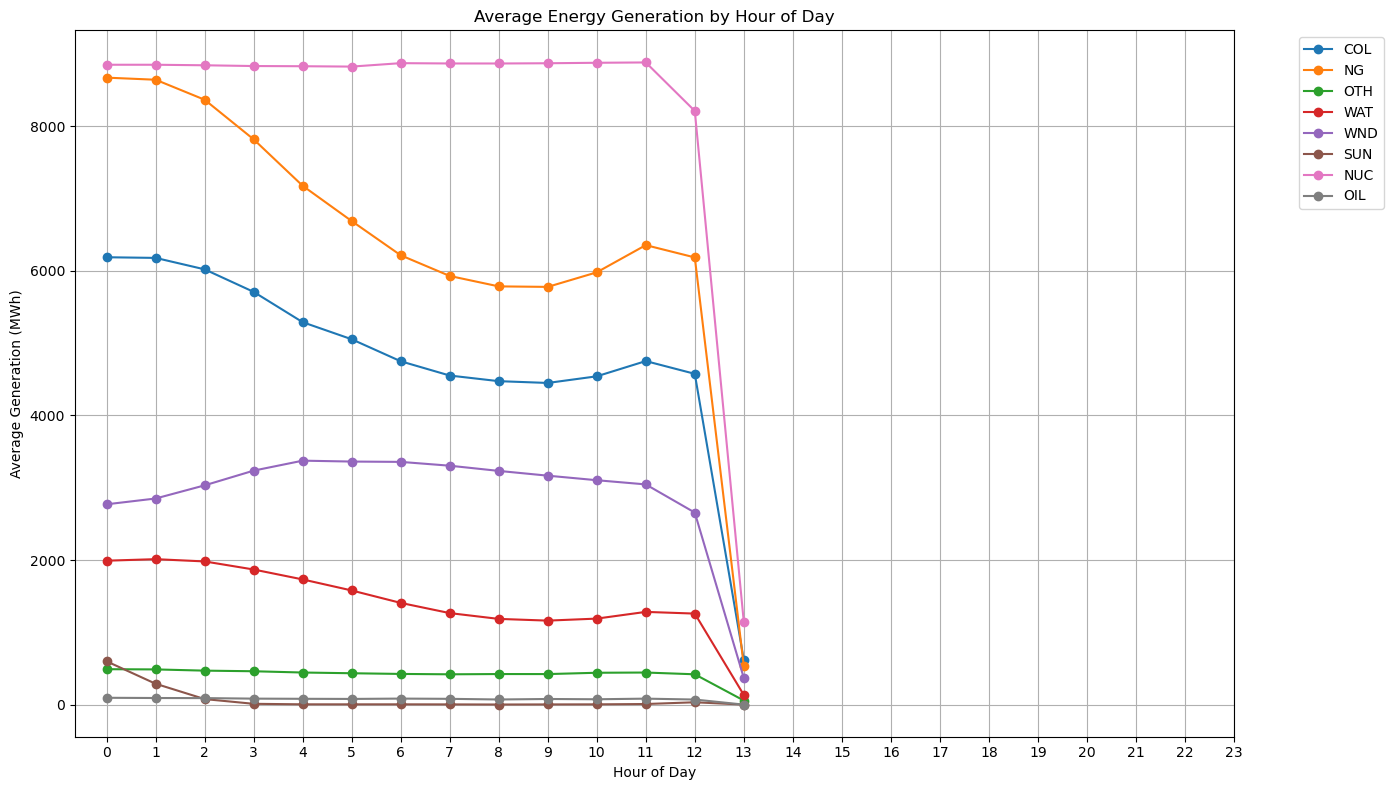

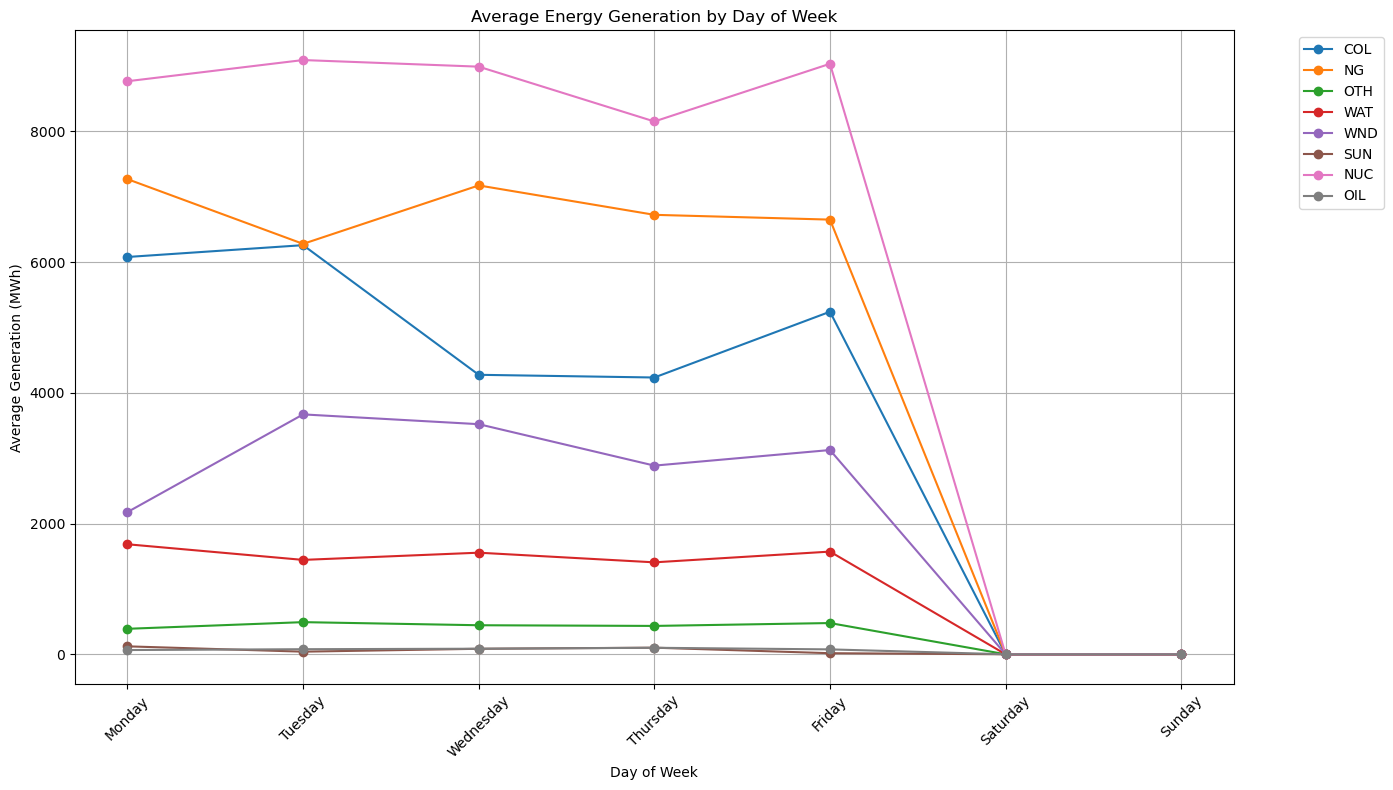

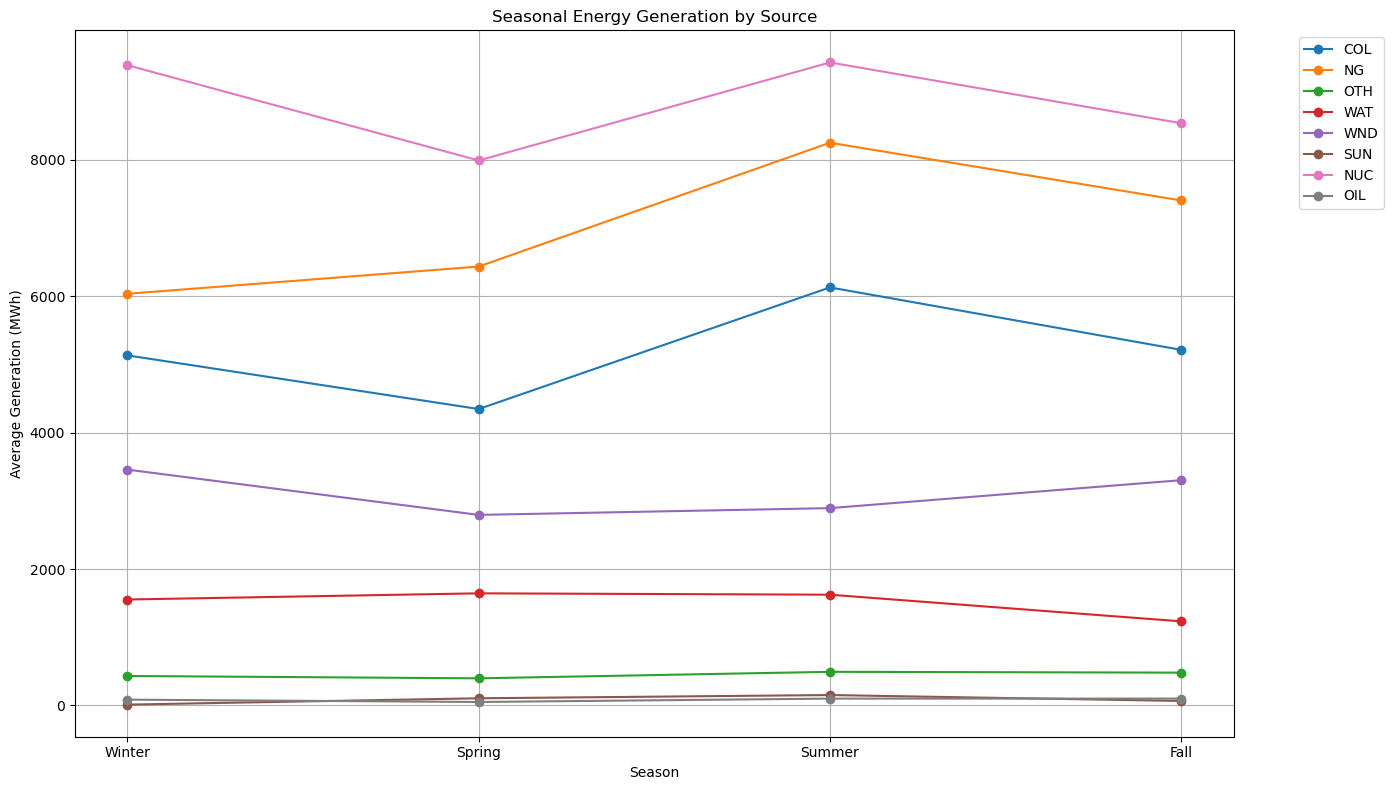

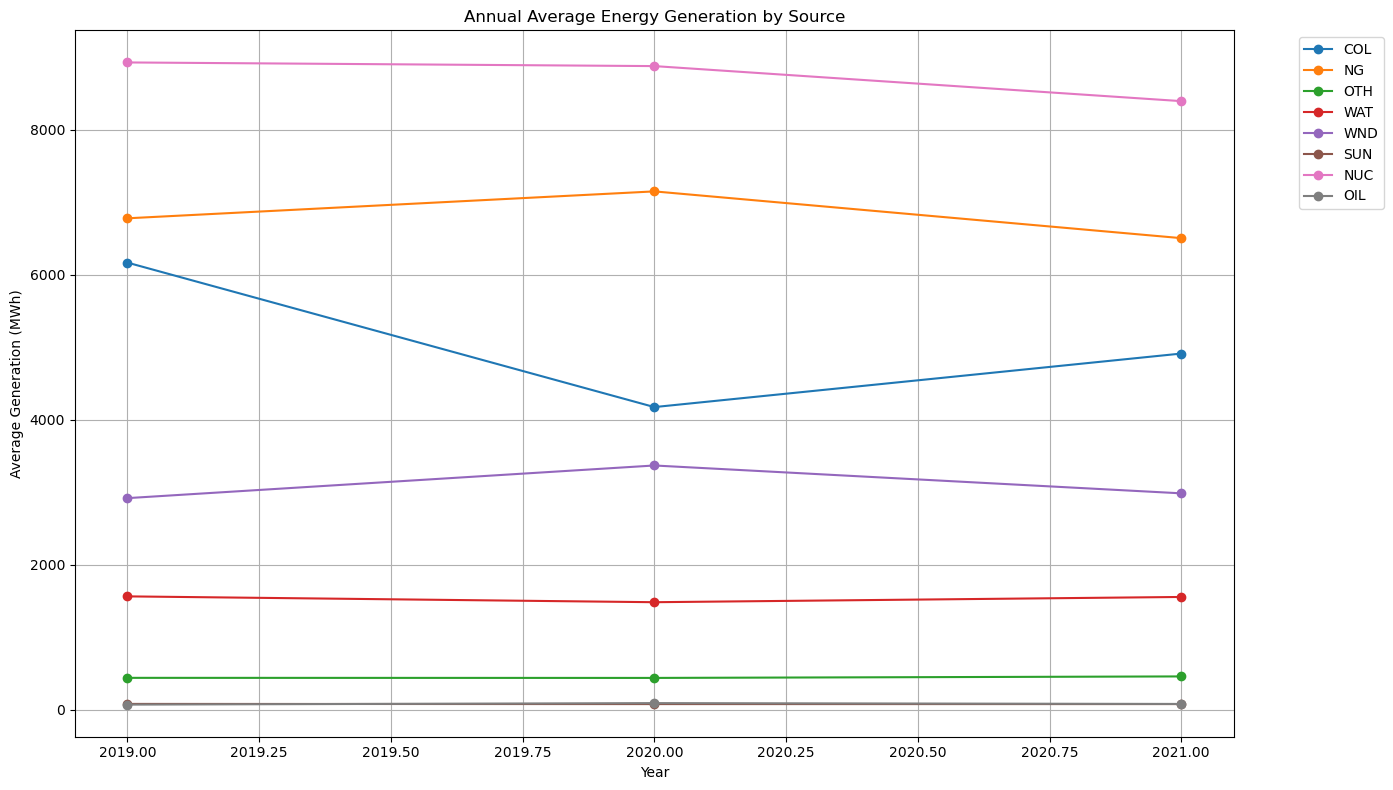

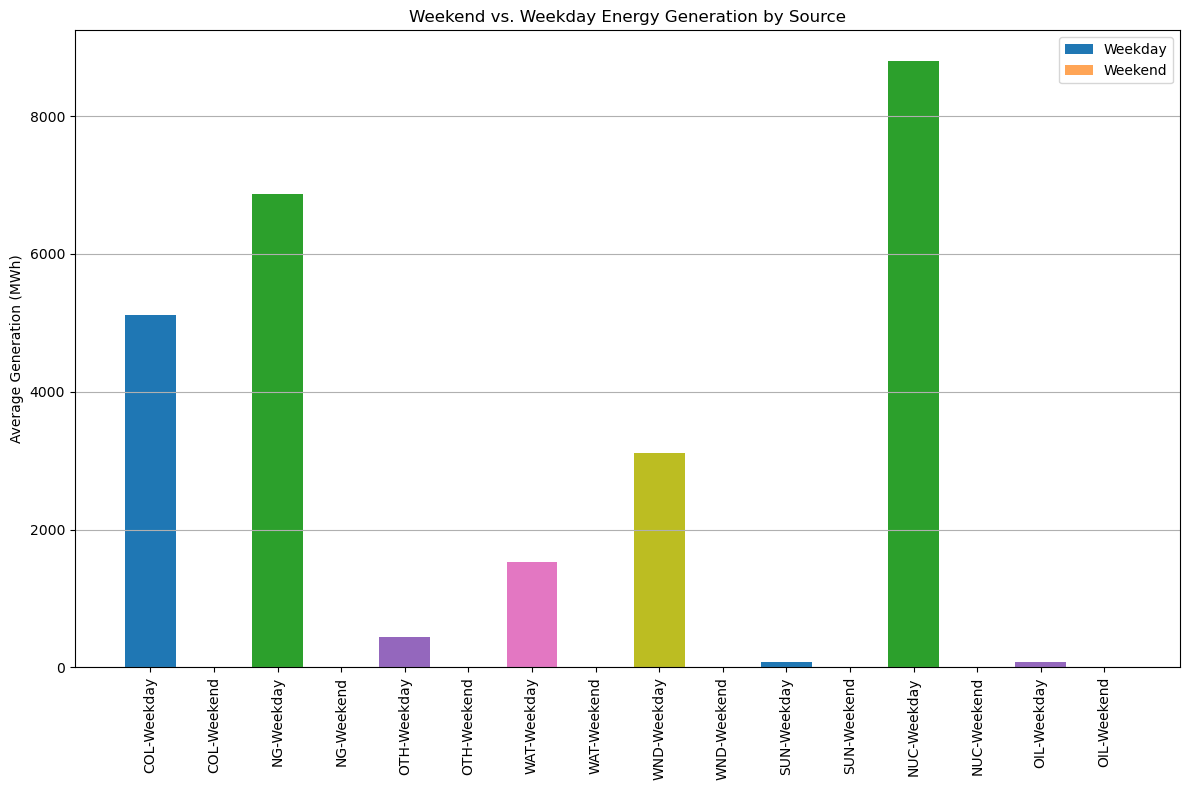

In [81]:
if energy_df is not None and not energy_df.empty:    
    print("\n## Time-Based Features Analysis")

    combined_df['hour'] = combined_df['period'].dt.hour
    combined_df['day_of_week'] = combined_df['period'].dt.dayofweek
    combined_df['month'] = combined_df['period'].dt.month
    combined_df['year'] = combined_df['period'].dt.year
    combined_df['is_weekend'] = combined_df['day_of_week'] >= 5
    combined_df['season'] = pd.cut(
        combined_df['month'],
        bins=[0, 3, 6, 9, 12],
        labels=['Winter', 'Spring', 'Summer', 'Fall'],
        include_lowest=True
    )
    
    hourly_data = combined_df.groupby(['hour', 'energy_source'])['value'].mean().reset_index()
    
    plt.figure(figsize=(14, 8))
    for source in combined_df['energy_source'].unique():
        source_data = hourly_data[hourly_data['energy_source'] == source]
        plt.plot(source_data['hour'], source_data['value'], marker='o', label=source)
    plt.title('Average Energy Generation by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Generation (MWh)')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.show()

    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    combined_df['day_name'] = combined_df['day_of_week'].apply(lambda x: day_names[x])
    
    daily_data = combined_df.groupby(['day_name', 'energy_source'])['value'].mean().reset_index()
    
    plt.figure(figsize=(14, 8))
    for source in combined_df['energy_source'].unique():
        source_data = daily_data[daily_data['energy_source'] == source]
        day_order = [source_data[source_data['day_name'] == day] for day in day_names]
        day_values = [d['value'].values[0] if not d.empty else 0 for d in day_order]
        plt.plot(day_names, day_values, marker='o', label=source)
    plt.title('Average Energy Generation by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Generation (MWh)')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    season_data = combined_df.groupby(['season', 'energy_source'])['value'].mean().reset_index()
    
    plt.figure(figsize=(14, 8))
    seasons = ['Winter', 'Spring', 'Summer', 'Fall']
    for source in combined_df['energy_source'].unique():
        source_data = season_data[season_data['energy_source'] == source]
        season_order = [source_data[source_data['season'] == s] for s in seasons]
        season_values = [s['value'].values[0] if not s.empty else 0 for s in season_order]
        plt.plot(seasons, season_values, marker='o', label=source)
    plt.title('Seasonal Energy Generation by Source')
    plt.xlabel('Season')
    plt.ylabel('Average Generation (MWh)')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    yearly_data = combined_df.groupby(['year', 'energy_source'])['value'].mean().reset_index()
    
    plt.figure(figsize=(14, 8))
    for source in combined_df['energy_source'].unique():
        source_data = yearly_data[yearly_data['energy_source'] == source]
        plt.plot(source_data['year'], source_data['value'], marker='o', label=source)
    plt.title('Annual Average Energy Generation by Source')
    plt.xlabel('Year')
    plt.ylabel('Average Generation (MWh)')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
 
    weekend_data = combined_df.groupby(['is_weekend', 'energy_source'])['value'].mean().reset_index()
    
    plt.figure(figsize=(12, 8))
    for source in combined_df['energy_source'].unique():
        source_data = weekend_data[weekend_data['energy_source'] == source]
        weekend_value = source_data[source_data['is_weekend']]['value'].values[0] if not source_data[source_data['is_weekend']].empty else 0
        weekday_value = source_data[~source_data['is_weekend']]['value'].values[0] if not source_data[~source_data['is_weekend']].empty else 0
        plt.bar(f"{source}-Weekday", weekday_value, label=f"{source}-Weekday" if source == combined_df['energy_source'].unique()[0] else "")
        plt.bar(f"{source}-Weekend", weekend_value, label=f"{source}-Weekend" if source == combined_df['energy_source'].unique()[0] else "", alpha=0.7)
    plt.title('Weekend vs. Weekday Energy Generation by Source')
    plt.ylabel('Average Generation (MWh)')
    plt.xticks(rotation=90)
    plt.legend(['Weekday', 'Weekend'])
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


## Machine Learning Analysis: Simple Clustering Approach
Using pre-filled energy matrix for analysis...

Resampling to daily data...

Scaling data manually...

Performing simple clustering into 3 groups...

Visualizing clustering results...


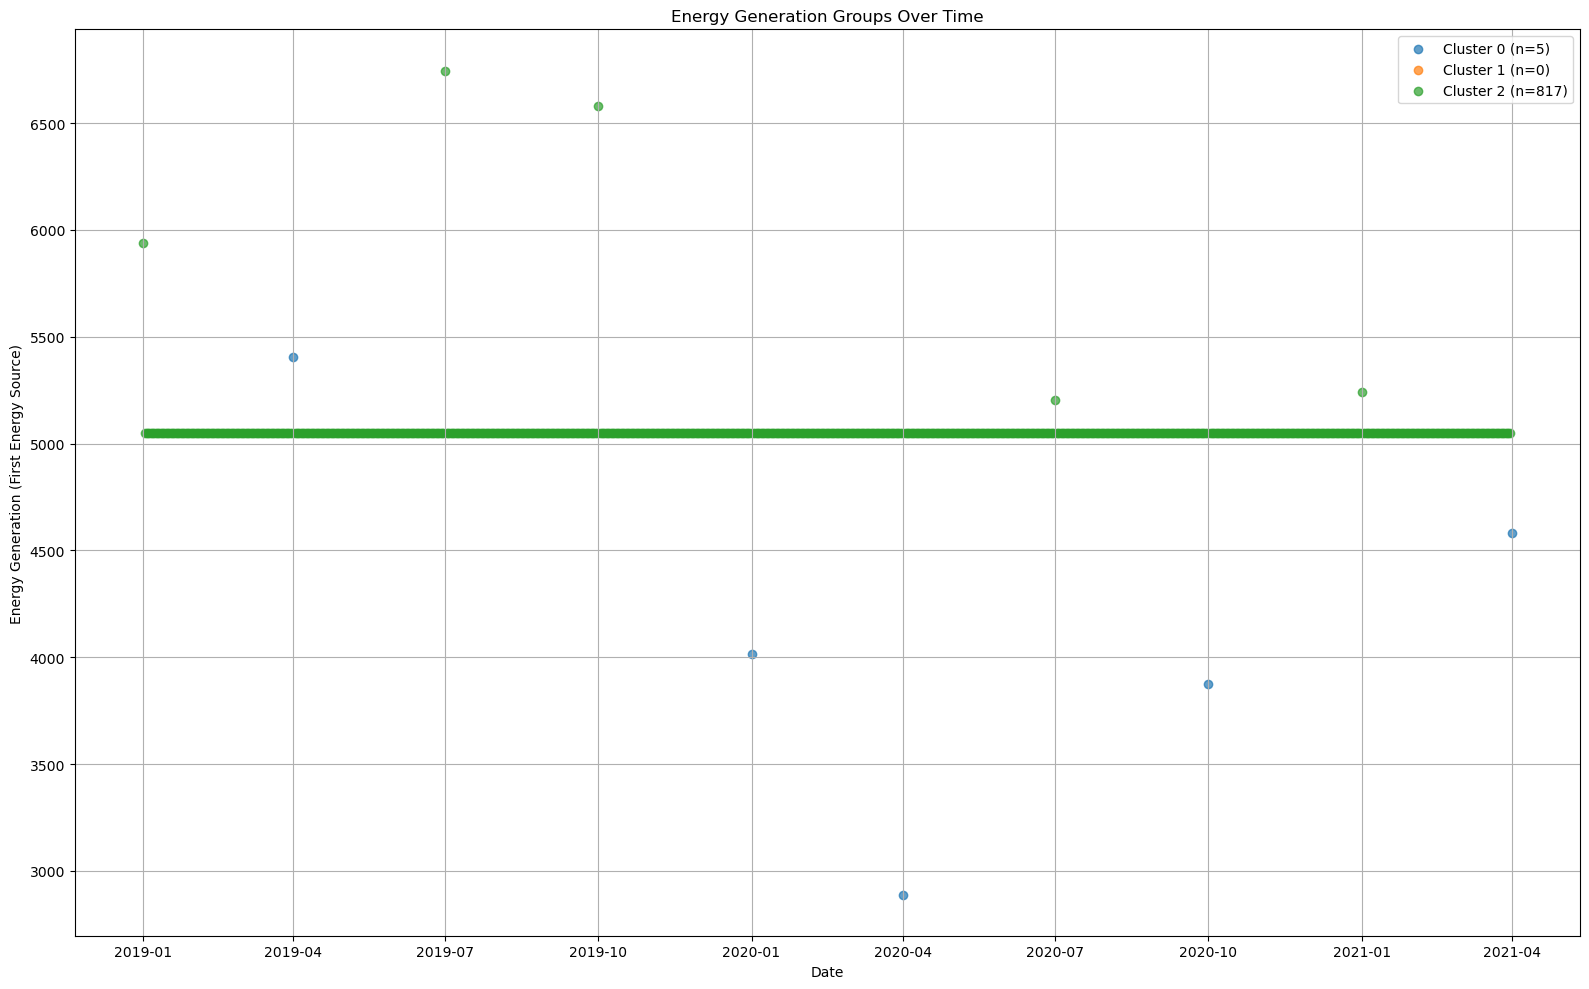


Cluster Characteristics:
Average values by cluster (first 5 energy sources):
energy_source          COL           NG          NUC        OIL         OTH
cluster                                                                    
0              4153.946029  6447.220191  8277.466921  75.498398  388.961497
2              5053.497541  6736.974969  8740.636306  80.816663  435.935214


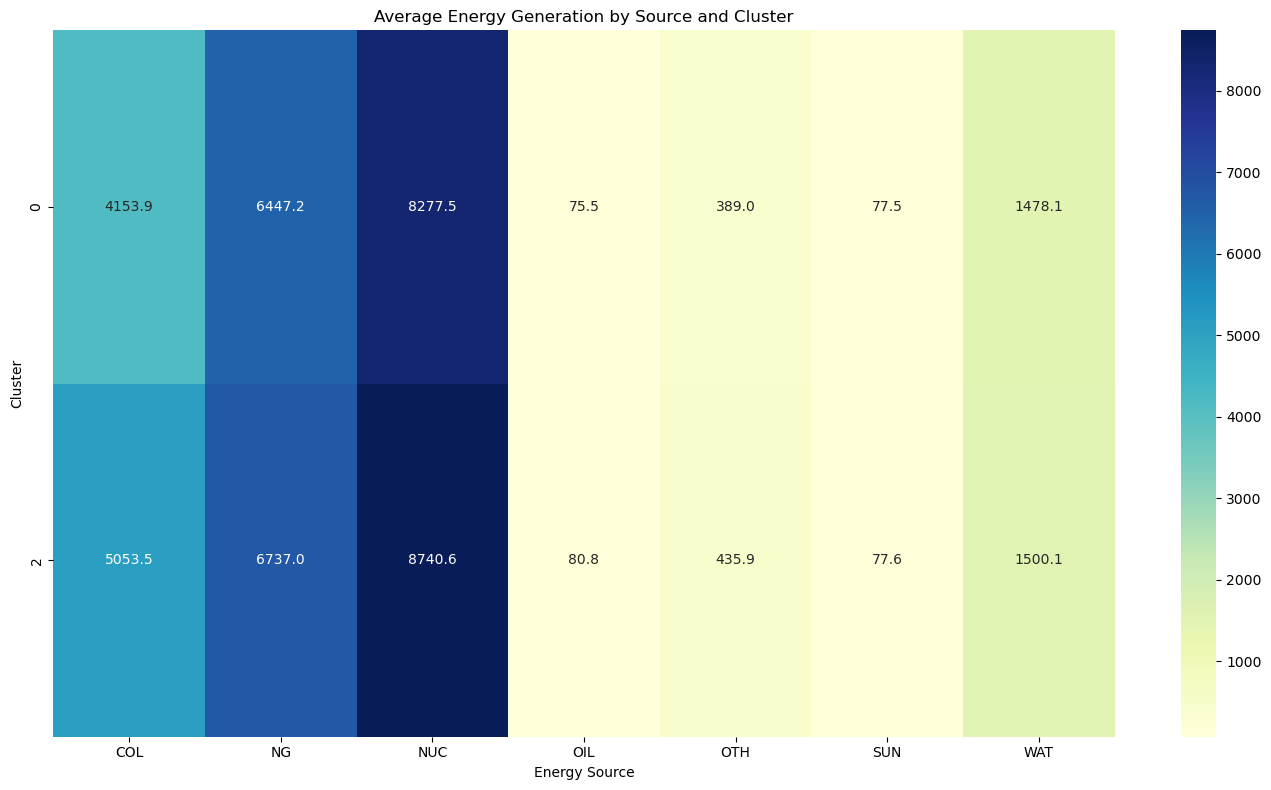


Performing simplified PCA...


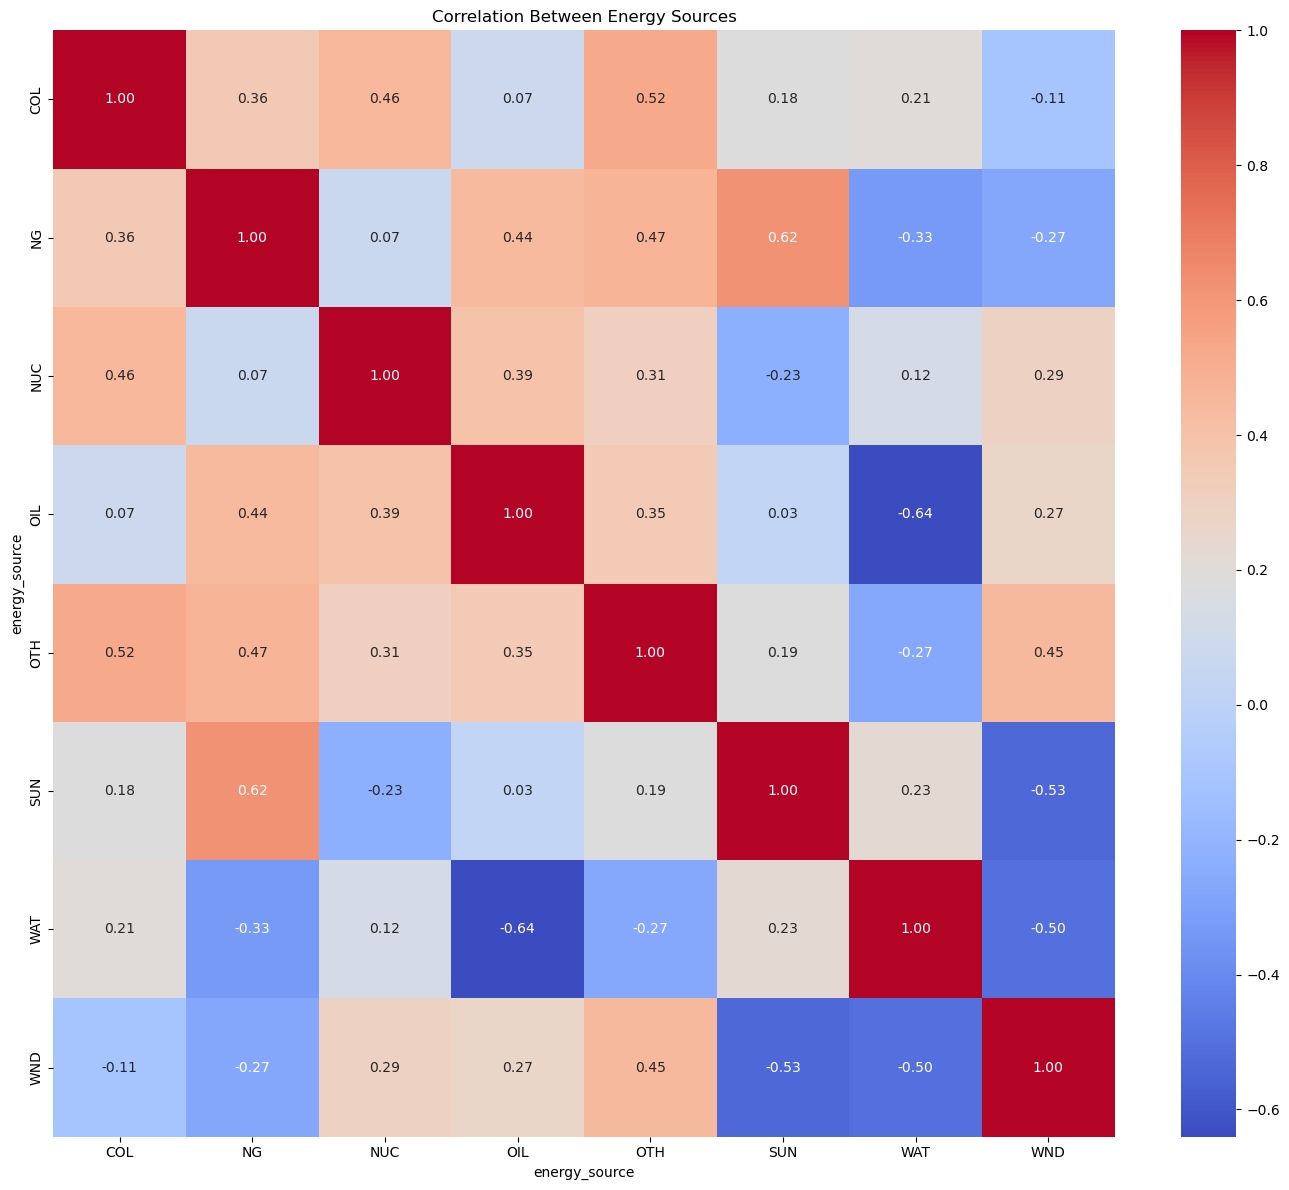

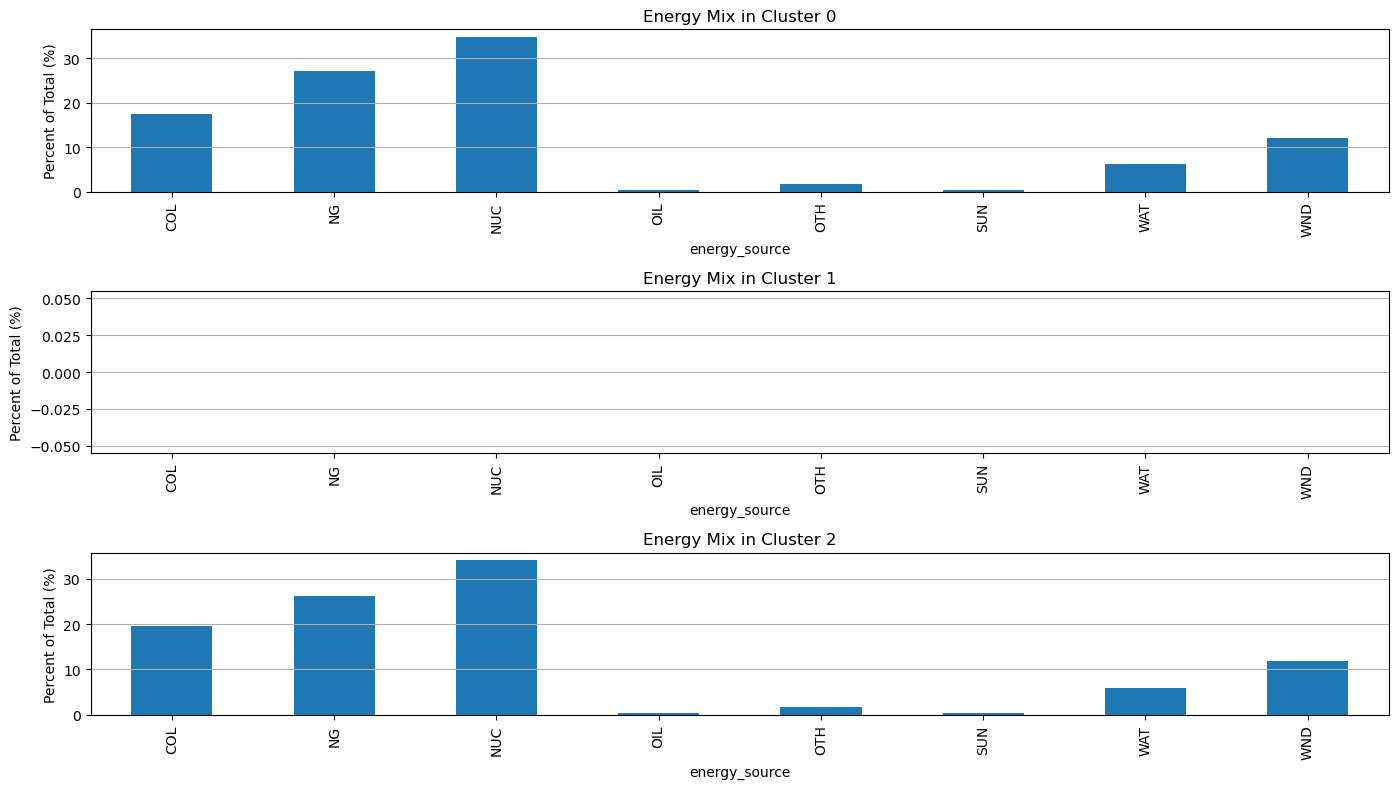


Clustering Summary:
Cluster 0 (Low Generation): 5 days
Cluster 1 (Medium Generation): 0 days
Cluster 2 (High Generation): 817 days


<Figure size 1200x600 with 0 Axes>

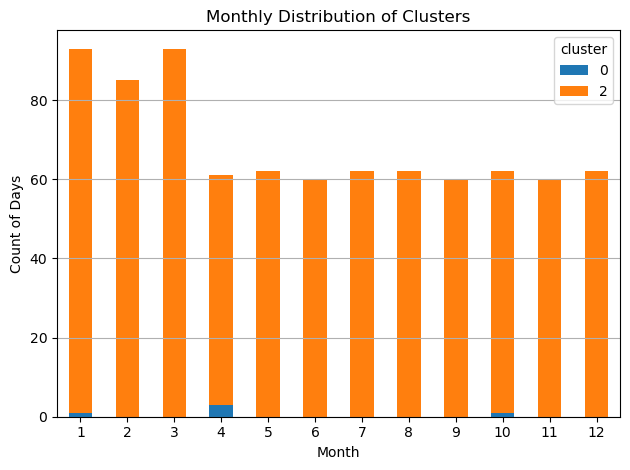


Analysis complete!


In [82]:
if energy_df is not None and not energy_df.empty:
    print("\n## Machine Learning Analysis: Simple Clustering Approach")

    print("Using pre-filled energy matrix for analysis...")
    
    if 'energy_matrix_filled' not in locals() or energy_matrix_filled is None:
        print("Creating and filling energy matrix...")
        if 'combined_df' not in locals():
            combined_df = energy_df.copy()
            combined_df.rename(columns={'fueltype': 'energy_source'}, inplace=True)
            combined_df['period'] = pd.to_datetime(combined_df['period'])
            combined_df['value'] = pd.to_numeric(combined_df['value'], errors='coerce')

        energy_grouped = combined_df.groupby(['period', 'energy_source'])['value'].mean()
        energy_matrix = energy_grouped.unstack(level='energy_source')
        energy_matrix_filled = energy_matrix.copy()

        for col in energy_matrix.columns:
            col_mean = energy_matrix[col].mean()
            energy_matrix_filled[col].fillna(col_mean, inplace=True)

    print("\nResampling to daily data...")
    daily_matrix = energy_matrix_filled.resample('D').mean()

    for col in daily_matrix.columns:
        if daily_matrix[col].isnull().any():
            daily_matrix[col].fillna(daily_matrix[col].mean(), inplace=True)

    print("\nScaling data manually...")
    scaled_df = pd.DataFrame(index=daily_matrix.index)
    for col in daily_matrix.columns:
        mean_val = daily_matrix[col].mean()
        std_val = daily_matrix[col].std()
        if std_val == 0:  
            scaled_df[col] = 0
        else:
            scaled_df[col] = (daily_matrix[col] - mean_val) / std_val
    
    print("\nPerforming simple clustering into 3 groups...")
    

    daily_total = daily_matrix.sum(axis=1)

    low_thresh = daily_total.quantile(0.25)
    high_thresh = daily_total.quantile(0.75)
    
    cluster_labels = [0 if x < low_thresh else (1 if x < high_thresh else 2) for x in daily_total]
    daily_matrix['cluster'] = cluster_labels

    print("\nVisualizing clustering results...")

    plt.figure(figsize=(16, 10))
    for cluster in range(3):
        cluster_data = daily_matrix[daily_matrix['cluster'] == cluster]
        plt.scatter(cluster_data.index, cluster_data.iloc[:, 0], 
                   label=f'Cluster {cluster} (n={len(cluster_data)})', alpha=0.7)
    plt.title('Energy Generation Groups Over Time')
    plt.xlabel('Date')
    plt.ylabel('Energy Generation (First Energy Source)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("\nCluster Characteristics:")
    cluster_means = daily_matrix.groupby('cluster').mean()
    print("Average values by cluster (first 5 energy sources):")
    print(cluster_means.iloc[:, :5])
    
    plt.figure(figsize=(14, 8))
    sns.heatmap(cluster_means.iloc[:, :-1], annot=True, fmt='.1f', cmap='YlGnBu')
    plt.title('Average Energy Generation by Source and Cluster')
    plt.xlabel('Energy Source')
    plt.ylabel('Cluster')
    plt.tight_layout()
    plt.show()
 
    print("\nPerforming simplified PCA...")

    corr_matrix = daily_matrix.iloc[:, :-1].corr()

    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Between Energy Sources')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 8))
    for i, cluster in enumerate(range(3)):
        cluster_data = daily_matrix[daily_matrix['cluster'] == cluster]
        pct = cluster_data.iloc[:, :-1].sum() / cluster_data.iloc[:, :-1].sum().sum() * 100
        plt.subplot(3, 1, i+1)
        pct.plot(kind='bar')
        plt.title(f'Energy Mix in Cluster {cluster}')
        plt.ylabel('Percent of Total (%)')
        plt.grid(axis='y')
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    print("\nClustering Summary:")
    print(f"Cluster 0 (Low Generation): {(daily_matrix['cluster']==0).sum()} days")
    print(f"Cluster 1 (Medium Generation): {(daily_matrix['cluster']==1).sum()} days")
    print(f"Cluster 2 (High Generation): {(daily_matrix['cluster']==2).sum()} days")

    daily_matrix['month'] = daily_matrix.index.month
    monthly_dist = pd.crosstab(daily_matrix['month'], daily_matrix['cluster'])
    
    plt.figure(figsize=(12, 6))
    monthly_dist.plot(kind='bar', stacked=True)
    plt.title('Monthly Distribution of Clusters')
    plt.xlabel('Month')
    plt.ylabel('Count of Days')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    
    print("\nAnalysis complete!")
else:
    print("Data not available for clustering analysis.")